In [1]:
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class CSWTask():

  def __init__(self):
    return None

  def get_graph(self,graph_pr):
    """ 
    returns a dict which encodes graph
    {frnode:{tonode:pr,},}
    """
    r = np.round(graph_pr,2)
    s = np.round(1-graph_pr,2)
    graph = {
      1:{3:.5,4:.5},
      2:{3:.5,4:.5},
      3:{5:r,6:s},
      4:{5:s,6:r},
      5:{7:r,8:s},
      6:{7:s,8:r},
      7:{9:1.0},
      8:{9:1.0}
    }
    return graph

  def gen_single_path(self,begin_node,graph):
    """
    begin_node should be 1 (coffee) or 2 (bar)
    subsequent transitions controlled by graph PR
    ends when reach END_NODE
    """
    end_node = 9
    path = []
    frnode = begin_node
    while frnode!= end_node:
      path.append(frnode)
      distr = graph[frnode]
      tonodes = list(distr.keys())
      pr = list(distr.values())
      frnode = np.random.choice(tonodes,p=pr)
    path.append(end_node)
    return np.array(path)
  


In [3]:
class Learner():
  def __init__(self):
    self.num_states = 10
    self.T = None
    return None
  
  def initT(self):
    T = np.round(np.random.random((self.num_states,self.num_states)),2)
    T = np.transpose(T/T.sum(axis=0))
    self.T = T
    return None
  
  def updateT(self,path,alpha=0.3):
    T = self.T
    for frnode,tonode in zip(path[:-1],path[1:]):
      O = np.zeros(self.num_states)
      O[tonode] = 1
      error = O-T[frnode,:]
      T[frnode,:] += alpha*(error)
    return None

In [4]:
# p = 0.8
# from_node = 2 # 1 coffee 2 bar
# csw = CSWTask()
# graphs = [csw.get_graph(p),csw.get_graph(1-p)]
# graph = graphs[from_node-1]
# path = csw.gen_single_path(1,graph)

In [5]:
# initialize environment
pr = 1.0
csw = CSWTask()
graphs = [csw.get_graph(pr),csw.get_graph(1-pr)]

# initialize learner
learner = Learner()

In [8]:
learner.initT()
epochs = 200
block_size = 40
block = 1
alpha = 0.25
dataL = []
for ep in range(epochs):
  if ep%block_size == 0:
    block+=1
  start_node = (block%2)+1
  graph = graphs[start_node-1]
  path = csw.gen_single_path(start_node,graph)
  learner.updateT(path,alpha)
  dataL.append(learner.T[3,(5,6)])
data_arr1 = np.array(dataL)

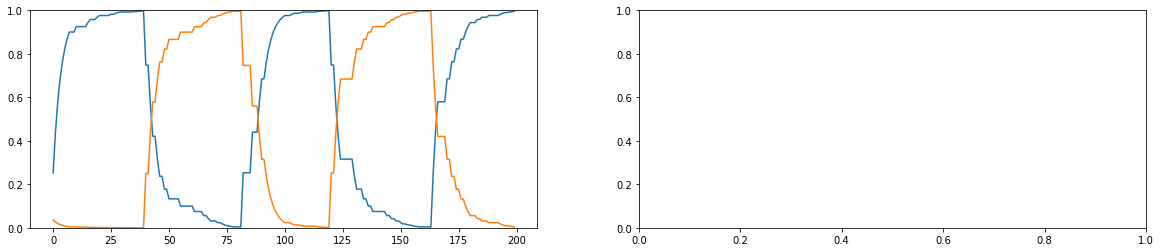

In [9]:
fig,axarr = plt.subplots(1,2,figsize=(20,4)); axarr=axarr.reshape(-1)
axarr[0].plot(data_arr1)
# axarr[1].plot(data_arr2)
for ax in axarr:
  ax.set_ylim(0,1)